In [34]:
import matplotlib.pyplot as plt
import numpy as np

theta = np.pi/6.0

R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
X = np.array([[0, 0, 10], [0, 10, 0]])
Y = np.dot(R, X) + 0.2

xLabels = ["X1", "X2", "X3"]
yLabels = ["Y1", "Y2", "Y3"]

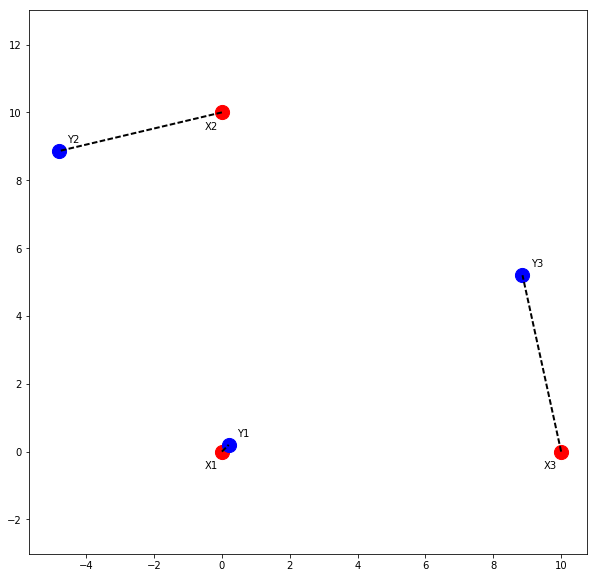

In [35]:
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(np.array(X[0, :]), np.array(X[1, :]), s=200, color='red')
plt.scatter(np.array(Y[0, :]), np.array(Y[1, :]), s=200, color='blue')

for label, x, y in zip(xLabels, X[0, :], X[1, :]):
    plt.annotate(label, xy=(x, y), xytext=(x - 0.5, y - 0.5))

for label, x, y in zip(yLabels, Y[0, :], Y[1, :]):
    plt.annotate(label, xy=(x, y), xytext=(x + 0.25, y + 0.25))
    
for x0, y0, x1, y1 in zip(X[0, :], X[1, :], Y[0, :], Y[1, :]):
    plt.plot([x0, x1], [y0, y1], color='k', linestyle='--', linewidth=2)
    
plt.axis('equal')
plt.show()

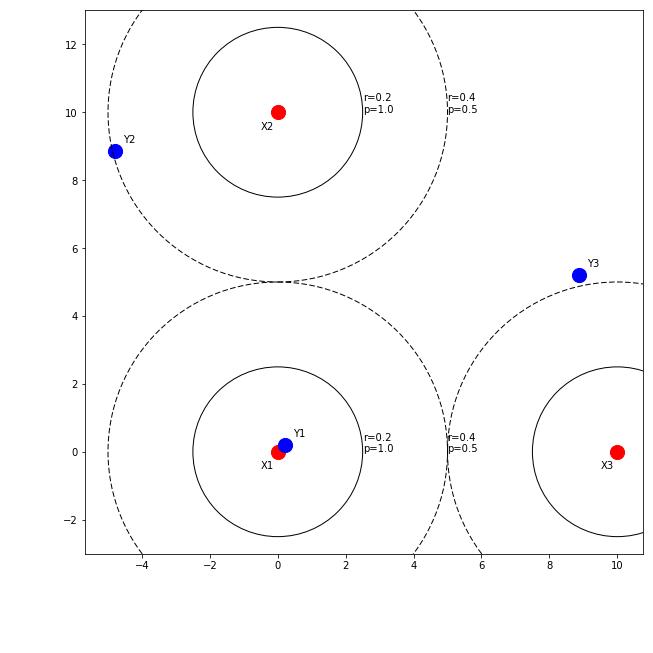

In [16]:
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
ax = fig.gca()

plt.axis('equal')

ax.scatter(np.array(X[0, :]), np.array(X[1, :]), s=200, color='red')
ax.scatter(np.array(Y[0, :]), np.array(Y[1, :]), s=200, color='blue')

for label, x, y in zip(xLabels, X[0, :], X[1, :]):
    plt.annotate(label, xy=(x, y), xytext=(x - 0.5, y - 0.5))

for label, x, y in zip(yLabels, Y[0, :], Y[1, :]):
    plt.annotate(label, xy=(x, y), xytext=(x + 0.25, y + 0.25))
    
for x0, y0 in zip(X[0, :], X[1, :]):
    ax.add_artist(plt.Circle((x0, y0), 2.5, color='black', fill=False))
    ax.add_artist(plt.Circle((x0, y0), 5.0, color='black', linestyle='--', fill=False))
    plt.annotate("r=0.2\np=1.0", xy=(x0 + 2.5, y0), xytext=(x0 + 2.5, y0))
    plt.annotate("r=0.4\np=0.5", xy=(x0 + 5.0, y0), xytext=(x0 + 5.0, y0))

plt.show()

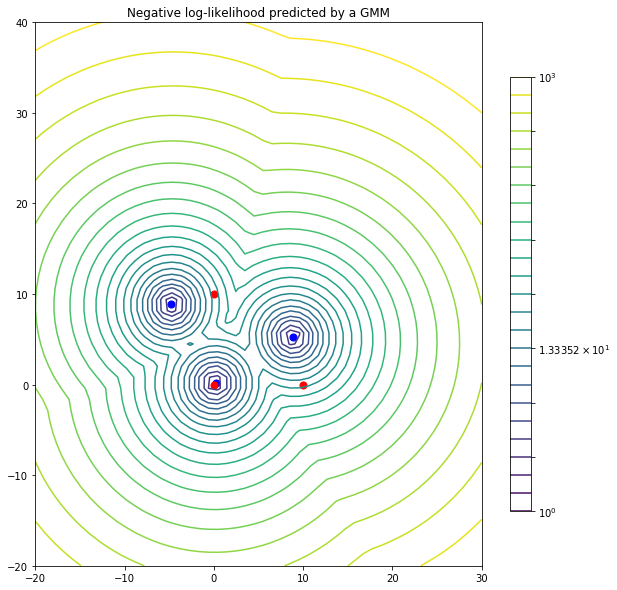

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

n_samples = 300

# generate random sample, two components
np.random.seed(0)
X1 = np.dot(R, np.array([0, 0])) + 0.2
X2 = np.dot(R, np.array([0, 10])) + 0.2
X3 = np.dot(R, np.array([10, 0])) + 0.2

# generate spherical data centered on (0, 0)
g1 = 0.75 * np.random.randn(n_samples, 2) + X1
g2 = 0.75 * np.random.randn(n_samples, 2) + X2
g3 = 0.75 * np.random.randn(n_samples, 2) + X3

# concatenate the two datasets into the final training set
X_train = np.vstack([g1, g2, g3])

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=3, covariance_type='full')
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)
                     
X_train = np.vstack([X1, X2, X3])


plt.rcParams["figure.figsize"] = (10,10)
CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 25))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], s=50, color='blue')
plt.scatter([0, 0, 10], [0, 10, 0], s=50, color='red')

plt.title('Negative log-likelihood predicted by a GMM')
plt.show()